# Phase 3 Review

![review guy](https://media.giphy.com/media/3krrjoL0vHRaWqwU3k/giphy.gif)

# TOC 

1. [Gradient Descent](#grad_desc)
2. [Logistic Regression](#logistic)
3. [Confusion Matrix](#con_mat)
4. [Accuracy/Precision/Recall/F1](#more_metric)
5. [auc_roc](#auc_roc)
3. [Algos](#algos)

## Gradient Descent

### Question
What is a loss function? (Explain it in terms of the relationship between true and predicted values) 



### Question: 

What loss functions do we know and what types of data work best with each?

With a parametric model, such as linear regression, describe how the parameters (betas) influence the loss.  

Below, you will see a set of predictors created from numpy's random normal function.  There is also a dependent feature created by adding some noise to feature_1.  We will use this contrived data to practice and think about gradient descent.

In [374]:
# Run no changes
import numpy as np
import pandas as pd 

np.random.seed(34453)

feature_1 = np.random.normal(0,1,1000)
feature_2 = np.random.normal(1,2,1000)
feature_3 = np.random.normal(2,3,1000)

X = pd.DataFrame()

X['f_1'] = feature_1
X['f_2'] = feature_2
X['f_3'] = feature_3

y = feature_1 + np.random.normal(0,.5,1000)

Let's start with the following set of guesses for our betas. 

In [375]:
# initial guesses
beta_f1 = 0
beta_f2 = 0
beta_f3 = 0
intercept = 0

In [376]:
# create an array, y_hat, of the predictions based on the initial guesses.
y_hat = beta_f1*feature_1 + beta_f2*feature_2 + beta_f3*feature_3 + intercept

In [377]:
# calculate the loss with the initial guesses
loss = (np.sum((y - y_hat)**2))

In [378]:
loss

1297.8102712847478

In [526]:
# nudge the beta for f1 up by .1 and create new predictions
beta_f1 = 0.0
y_hat = beta_f1*feature_1 + beta_f2*feature_2 + beta_f3*feature_3 + intercept

In [529]:
# calculate the new loss
loss = (np.sum((y - y_hat)**2))
loss

1297.8102712847478

In [431]:
# now calculate what the loss would be  if the f1 beta was nuged .01 in the opposite direction


### Question
Which direction should we nudge the f_1 beta?

### Question: 
The above is trial and error.  Instead of trial and error, we can use calculus.  How do we use the partial derivative of the loss function to update the parameters?

In [580]:
derivative_wrt_beta1 = np.sum(-2*feature_1*(y - beta_f1*feature_1))
print('derivative', derivative_wrt_beta1)
print('current_beta', beta_f1)
print('new_beta', beta_f1-(0.0001*derivative_wrt_beta1))
print('difference between new beta and old beta', (beta_f1-(0.0001*derivative_wrt_beta1)) - beta_f1)
beta_f1 = beta_f1-(0.0001*derivative_wrt_beta1)


derivative -0.12370655029391386
current_beta 1.0078056838696248
new_beta 1.0078180545246542
difference between new beta and old beta 1.2370655029458888e-05


In [576]:
np.sum(-2*feature_1*(y - beta_f1*feature_1))

-0.24791021381339107

### Question:
What is a step size when talking about gradient descent?

### Question

Why does step size decrease as we approach minimum loss?

## Question

How does learning rate regulate step size?

<a id='logistic'></a>

# Logistic Regression and Modeling

What type of target do we feed the logistic regression model?

In [ ]:
categorical

Is logistic regression a parametric or non-parametric model?

In [ ]:
parametric

Describe the journey from beta's to 0/1 predictions.

In [ ]:
betas are in terms of log odds, we then apply the (1/(1+e^-yhat)) which is the sigmoid function to get the probabilities

Is logistic regression a black box model?

In [ ]:
no, although interpretting log odds can be a bit complicated for the uninitiated

What hyperparameters are important when tuning logistic regression models?

In [ ]:
C controls regularization, you can add l1, l2 or elastic net regularization penalties, you can change the solver, 

Your dataset is highly imbalanced, and your logistic regression has a poor precision score.  What is one way that you might possibly boost the number of positive predictions?

In [ ]:
You could change the threshhold for calling something a positive from 0.5 to something lower or change the class weight

# Now let's code

In [69]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer(as_frame=True)
X = data['data']
y = data['target']
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [71]:
# Perform a train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

### Question: 
What is the purpose of train/test split?  
so we can have a backup set of unseen data to decide if we are overfitting

### Question: 
Why should we never fit to the test portion of our dataset?

In [76]:
# Scale the training set using a standard scaler
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)

In [78]:
X_train_scaled

array([[ 1.81467066,  0.24160474,  1.7661217 , ...,  0.6625071 ,
         0.42562508, -1.10817024],
       [-1.67894755, -0.6330873 , -1.65187129, ..., -1.3613559 ,
         0.2516302 , -0.56775673],
       [-1.33710011,  0.47226765, -1.32073906, ..., -1.3613559 ,
        -0.85134605,  0.3815327 ],
       ...,
       [ 1.09738877,  0.09087452,  0.92181688, ...,  0.02398921,
         2.94022937, -1.25344269],
       [ 1.88867593,  2.62816656,  1.8073073 , ...,  0.73113285,
        -0.10695056, -0.14039159],
       [ 0.32033339,  2.513977  ,  0.4770124 , ...,  1.77096221,
         1.74042119,  2.96157141]])

### Question: 
Why is scaling our data important? For part of your answer, relate to one of the advantages of logistic regression over another classifier.

In [ ]:
If we are going to regularize, we should always scale,

In [79]:
# fit model with logistic regression to the appropriate portion of our dataset
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(X_train_scaled, y_train)

Now that we have fit our classifier, the object `lr` has been filled up with information about the best fit parameters.  Take a look at the coefficients held in the `lr` object.  Interpret what their magnitudes mean.

In [80]:
# Inspect the .coef_ attribute of lr and interpret
lr.coef_

array([[-0.49913592, -0.39131313, -0.50165457, -0.58024577, -0.20677084,
         0.26790064, -0.88132568, -0.95222682,  0.47746948,  0.20897548,
        -1.18615401, -0.0843232 , -0.7649874 , -0.98379504, -0.18767993,
         0.83289925,  0.17645878, -0.3597033 ,  0.0225973 ,  0.69789689,
        -0.9755652 , -0.7926066 , -0.89675499, -0.97125883, -0.84086834,
        -0.01042645, -0.85024784, -0.88353723, -0.79232507, -0.6229516 ]])

Logistic regression has a predict method just like linear regression.  Use the predict method to generate a set of predictions (y_hat_train) for the training set.

In [81]:
# use predict to generate a set of predictions
y_hat_train = lr.predict(X_train_scaled)

<a id='con_mat'></a>

## Confusion Matrix

Confusion matrices are a great way to visualize the performance of our classifiers. 

### Question: 
What does a good confusion matrix look like?

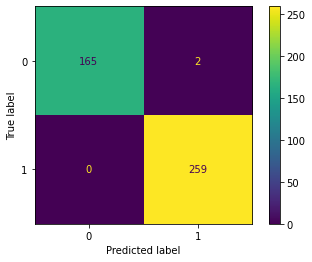

In [83]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lr, X_train_scaled, y_train)

In [ ]:
# create a confusion matrix for our logistic regression model fit on the scaled training data

## Accuracy/Precision/Recall/F_1 Score

We have a bunch of additional metrics, most of which we can figure out from the CM

## Question: 
Define accuracy. What is the accuracy score of our classifier?

In [ ]:
# Confirm accuracy in code

## Question: 
Why might accuracy fail to be a good representation of the quality of a classifier?

## Question: 
Define recall. What is the recall score of our classifier?

In [ ]:
# Confirm recall in code

## Question: 
Define precision. What is the precision score of our classifier?

In [ ]:
# Confirm precision in code

## Question: 
Define f1 score. What is the f1 score score of our classifier?

In [ ]:
# Confirm f1 score in code

<a id='auc_roc'></a>

## Auc_Roc

The AUC_ROC curve can't be deduced from the confusion matrix.  Describe what the AUC_ROC curve shows. 
Look [here](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5) for some nice visualizations of AUC_ROC.

Describe the AUC_ROC curve.  What does a good AUC_ROC curve look like? What is a good AUC_ROC score?

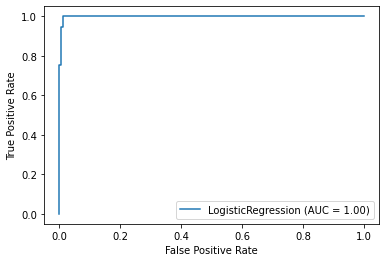

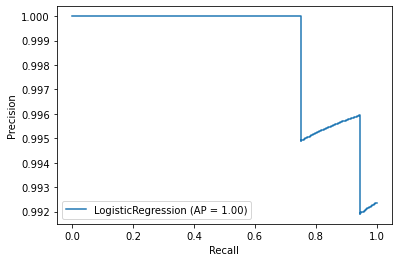

In [86]:
# Plot the AUC_ROC curve for our classifier
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve
plot_roc_curve(lr, X_train_scaled, y_train)
plot_precision_recall_curve(lr, X_train_scaled, y_train)

<a id='algos'></a>

# More Algorithms

Much of the sklearn syntax is shared across classifiers and regressors.  Fit, predict, and score are methods associated with all sklearn classifiers.  They work differently under the hood. KNN's fit method simply stores the training set in memory. Logistic regressions .fit() does the hard work of calculating coefficients. 

![lazy_george](https://media.giphy.com/media/8TJK6prvRXF6g/giphy.gif)

However, each algo also has specific parameters and methods associated with it.  For example, decision trees have feature importances and logistic has coefficients. KNN has n_neighbors and decision trees has max_depth.


Getting to know the algo's and their associated properties is an important area of study. 

That being said, you now are getting to the point that no matter which algorithm you choose, you can run the code to create a model as long as you have the data in the correct shape. Most importantly, the target is the appropriate form (continuous/categorical) and is isolated from the predictors.

Here are the algos we know so far. 
 - Linear Regression
 - Lasso/Ridge Regression
 - Logistic Regression
 - Naive-Bayes
 - KNN
 
> Note that KNN and decision trees also have regression classes in sklearn.


Here is a dataset from seaborn.  Let's work through the process of creating simple Decision Tree model for it.

In [87]:
import seaborn as sns
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


## Decision Trees: 

In [124]:
# split target from predictors
penguins = penguins.dropna()
X = penguins.drop('species', axis=1)
y = penguins['species']
X_train, X_test, y_train, y_test = train_test_split(X, y)

For the first simple model, let's just use the numeric predictors.

In [159]:
# isolate numeric predictors
X_train[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
233,48.4,14.6,213.0,5850.0
218,50.8,19.0,210.0,4100.0
160,46.0,18.9,195.0,4150.0
253,59.6,17.0,230.0,6050.0
131,43.1,19.2,197.0,3500.0
...,...,...,...,...
1,39.5,17.4,186.0,3800.0
232,45.5,13.7,214.0,4650.0
31,37.2,18.1,178.0,3900.0
110,38.1,16.5,198.0,3825.0


In [128]:
# Scale appropriately
X_train_scaled = ss.fit_transform(X_train[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']])
X_test_scaled = ss.fit_transform(X_test[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']])

In [160]:
# instantiate appropriate model and fit to appropriate part of data.
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X_train[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']], y_train)

In [161]:
# Create a set of predictions

y_hat_train = tree.predict(X_train[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']])
y_hat_test = tree.predict(X_test[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']])


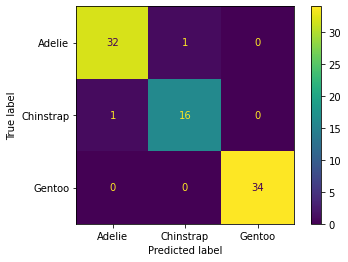

In [167]:
# Create and analyze appropriate metrics
plot_confusion_matrix(tree, X_test[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']], y_test)

In [168]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

print(accuracy_score(y_test, y_hat_test))
print(recall_score(y_test, y_hat_test, average='macro'))
print(precision_score(y_test, y_hat_test, average='macro'))
print(f1_score(y_test, y_hat_test, average='macro'))

0.9761904761904762
0.9702911467617351
0.9702911467617351
0.9702911467617351


## kNN

In [7]:
# Using the previously scaled data, create a kNN Classifier

In [8]:
# Compare the results with the Decision Tree